In [19]:
from __future__ import division,print_function,unicode_literals

import numpy as np 
import os 

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

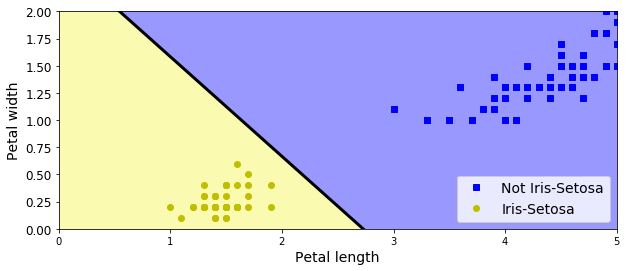

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]


axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

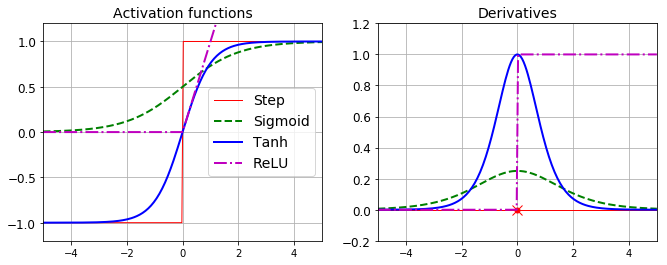

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [7]:
def heavside(z):
    return (z>=0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heavside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 -0.5) -0.5)

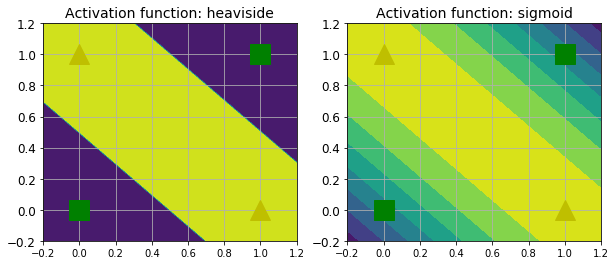

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heavside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [9]:
import tensorflow as tf

In [10]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28 * 28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28 * 28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [11]:
feature_cols = [tf.feature_column.numeric_column("X",shape=[28*28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                    feature_columns=feature_cols)
input_fn = tf.estimator.inputs.numpy_input_fn(
x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C047D2AEF0>, '_save_summary_steps': 100, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\B_Majda\\AppData\\Local\\Temp\\tmpnwdd9ncn', '_train_distribute': None, '_device_fn': None, '_evaluation_master': '', '_num_ps_replicas': 0, '_task_type': 'worker', '_log_step_count_steps': 100, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_master': '', '_save_checkpoints_steps': None, '_global_id_in_cluster': 0}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 i

INFO:tensorflow:global_step/sec: 312.312
INFO:tensorflow:loss = 1.4484974, step = 7201 (0.323 sec)
INFO:tensorflow:global_step/sec: 263.27
INFO:tensorflow:loss = 0.44243836, step = 7301 (0.377 sec)
INFO:tensorflow:global_step/sec: 276.426
INFO:tensorflow:loss = 1.2541941, step = 7401 (0.364 sec)
INFO:tensorflow:global_step/sec: 313.237
INFO:tensorflow:loss = 0.067444295, step = 7501 (0.318 sec)
INFO:tensorflow:global_step/sec: 282.245
INFO:tensorflow:loss = 1.824824, step = 7601 (0.354 sec)
INFO:tensorflow:global_step/sec: 315.776
INFO:tensorflow:loss = 0.37802213, step = 7701 (0.316 sec)
INFO:tensorflow:global_step/sec: 301.895
INFO:tensorflow:loss = 0.3602966, step = 7801 (0.330 sec)
INFO:tensorflow:global_step/sec: 294.784
INFO:tensorflow:loss = 0.8824009, step = 7901 (0.341 sec)
INFO:tensorflow:global_step/sec: 310.302
INFO:tensorflow:loss = 0.1451401, step = 8001 (0.322 sec)
INFO:tensorflow:global_step/sec: 285.82
INFO:tensorflow:loss = 0.6689942, step = 8101 (0.350 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 314.437
INFO:tensorflow:loss = 0.028325167, step = 15401 (0.313 sec)
INFO:tensorflow:global_step/sec: 356.93
INFO:tensorflow:loss = 0.02460772, step = 15501 (0.281 sec)
INFO:tensorflow:global_step/sec: 452.69
INFO:tensorflow:loss = 0.38903114, step = 15601 (0.221 sec)
INFO:tensorflow:global_step/sec: 395.319
INFO:tensorflow:loss = 0.10606478, step = 15701 (0.252 sec)
INFO:tensorflow:global_step/sec: 170.606
INFO:tensorflow:loss = 0.15634263, step = 15801 (0.584 sec)
INFO:tensorflow:global_step/sec: 304.084
INFO:tensorflow:loss = 0.09179009, step = 15901 (0.331 sec)
INFO:tensorflow:global_step/sec: 362.955
INFO:tensorflow:loss = 0.045782287, step = 16001 (0.275 sec)
INFO:tensorflow:global_step/sec: 438.115
INFO:tensorflow:loss = 0.015872857, step = 16101 (0.231 sec)
INFO:tensorflow:global_step/sec: 410.677
INFO:tensorflow:loss = 0.01914187, step = 16201 (0.242 sec)
INFO:tensorflow:global_step/sec: 352.519
INFO:tensorflow:loss = 0.08832076, step = 16301 (

INFO:tensorflow:global_step/sec: 302.164
INFO:tensorflow:loss = 0.003382074, step = 23501 (0.326 sec)
INFO:tensorflow:global_step/sec: 313.007
INFO:tensorflow:loss = 0.049786158, step = 23601 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.122
INFO:tensorflow:loss = 0.011157652, step = 23701 (0.328 sec)
INFO:tensorflow:global_step/sec: 316.945
INFO:tensorflow:loss = 0.0033705544, step = 23801 (0.315 sec)
INFO:tensorflow:global_step/sec: 306.283
INFO:tensorflow:loss = 0.02327459, step = 23901 (0.327 sec)
INFO:tensorflow:global_step/sec: 200.203
INFO:tensorflow:loss = 0.026401991, step = 24001 (0.499 sec)
INFO:tensorflow:global_step/sec: 255.356
INFO:tensorflow:loss = 0.10542022, step = 24101 (0.393 sec)
INFO:tensorflow:global_step/sec: 229.951
INFO:tensorflow:loss = 0.12191668, step = 24201 (0.434 sec)
INFO:tensorflow:global_step/sec: 259.424
INFO:tensorflow:loss = 0.068542615, step = 24301 (0.386 sec)
INFO:tensorflow:global_step/sec: 302.953
INFO:tensorflow:loss = 0.013321758, step = 

INFO:tensorflow:global_step/sec: 288.044
INFO:tensorflow:loss = 0.045869444, step = 31601 (0.347 sec)
INFO:tensorflow:global_step/sec: 288.842
INFO:tensorflow:loss = 0.022199592, step = 31701 (0.346 sec)
INFO:tensorflow:global_step/sec: 290.288
INFO:tensorflow:loss = 0.0029882025, step = 31801 (0.345 sec)
INFO:tensorflow:global_step/sec: 288.854
INFO:tensorflow:loss = 0.019510936, step = 31901 (0.342 sec)
INFO:tensorflow:global_step/sec: 286.338
INFO:tensorflow:loss = 0.012123862, step = 32001 (0.351 sec)
INFO:tensorflow:global_step/sec: 296.5
INFO:tensorflow:loss = 0.018385291, step = 32101 (0.339 sec)
INFO:tensorflow:global_step/sec: 308.634
INFO:tensorflow:loss = 0.0044393186, step = 32201 (0.324 sec)
INFO:tensorflow:global_step/sec: 286.208
INFO:tensorflow:loss = 0.022445096, step = 32301 (0.349 sec)
INFO:tensorflow:global_step/sec: 294.172
INFO:tensorflow:loss = 0.011953565, step = 32401 (0.340 sec)
INFO:tensorflow:global_step/sec: 290.669
INFO:tensorflow:loss = 0.030763354, step 

INFO:tensorflow:loss = 0.0047082156, step = 39601 (0.295 sec)
INFO:tensorflow:global_step/sec: 296.062
INFO:tensorflow:loss = 0.011957169, step = 39701 (0.342 sec)
INFO:tensorflow:global_step/sec: 283.243
INFO:tensorflow:loss = 0.03651225, step = 39801 (0.350 sec)
INFO:tensorflow:global_step/sec: 291.044
INFO:tensorflow:loss = 0.008675516, step = 39901 (0.348 sec)
INFO:tensorflow:global_step/sec: 290.964
INFO:tensorflow:loss = 0.018895153, step = 40001 (0.340 sec)
INFO:tensorflow:global_step/sec: 287.61
INFO:tensorflow:loss = 0.031397615, step = 40101 (0.346 sec)
INFO:tensorflow:global_step/sec: 292.851
INFO:tensorflow:loss = 0.010271154, step = 40201 (0.342 sec)
INFO:tensorflow:global_step/sec: 289.16
INFO:tensorflow:loss = 3.1113337e-05, step = 40301 (0.347 sec)
INFO:tensorflow:global_step/sec: 292.209
INFO:tensorflow:loss = 0.001051926, step = 40401 (0.341 sec)
INFO:tensorflow:global_step/sec: 292.185
INFO:tensorflow:loss = 0.01658697, step = 40501 (0.342 sec)
INFO:tensorflow:global

In [12]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
x={"X":X_test},y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-11-16:59:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\B_Majda\AppData\Local\Temp\tmpnwdd9ncn\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-11-16:59:47
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9805, average_loss = 0.09917414, global_step = 44000, loss = 12.553689
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\B_Majda\AppData\Local\Temp\tmpnwdd9ncn\model.ckpt-44000


In [13]:
eval_results

{'accuracy': 0.9805,
 'average_loss': 0.09917414,
 'global_step': 44000,
 'loss': 12.553689}

In [14]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\B_Majda\AppData\Local\Temp\tmpnwdd9ncn\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -9.0861225,  -2.7193797,  -1.904904 ,   1.3515157,  -9.85947  ,
        -11.30845  , -23.0834   ,  18.010918 ,  -3.6028411,  -3.8574445],
       dtype=float32),
 'probabilities': array([1.7057089e-12, 9.9299335e-10, 2.2421711e-09, 5.8198690e-08,
        7.8712590e-13, 1.8482507e-13, 1.4222116e-18, 9.9999988e-01,
        4.1045362e-10, 3.1819317e-10], dtype=float32)}

In [15]:
import tensorflow as tf 

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [20]:
reset_graph()

In [21]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None),name="y")

In [24]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init,name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]),name="bias")
        Z = tf.matmul(X, W) + b 
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [25]:
with tf.name_scope("gsn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", 
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="output")

In [26]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    
    loss = tf.reduce_mean(xentropy,name="loss")

In [29]:
learning_rate = 0.1 

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [37]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [30]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [31]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [32]:
n_epochs = 40 
batch_size = 50

In [33]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [38]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test  = accuracy.eval(feed_dict={X: mnist.validation.images, y: mnist.validation.labels})
        print(epoch, "Batch accuracy:", acc_train, "Val accuracy", acc_test)
        
    save_path = saver.save(sess, "./mu_final_model.ckpt")

0 Batch accuracy: 1.0 Val accuracy 0.9612
1 Batch accuracy: 1.0 Val accuracy 0.9696
2 Batch accuracy: 1.0 Val accuracy 0.9764
3 Batch accuracy: 1.0 Val accuracy 0.9768
4 Batch accuracy: 1.0 Val accuracy 0.979
5 Batch accuracy: 1.0 Val accuracy 0.977
6 Batch accuracy: 0.98 Val accuracy 0.9816
7 Batch accuracy: 1.0 Val accuracy 0.9824
8 Batch accuracy: 1.0 Val accuracy 0.981
9 Batch accuracy: 1.0 Val accuracy 0.9808
10 Batch accuracy: 1.0 Val accuracy 0.9816
11 Batch accuracy: 1.0 Val accuracy 0.9806
12 Batch accuracy: 1.0 Val accuracy 0.9822
13 Batch accuracy: 1.0 Val accuracy 0.982
14 Batch accuracy: 1.0 Val accuracy 0.9828
15 Batch accuracy: 1.0 Val accuracy 0.9826
16 Batch accuracy: 1.0 Val accuracy 0.982
17 Batch accuracy: 1.0 Val accuracy 0.982
18 Batch accuracy: 1.0 Val accuracy 0.9826
19 Batch accuracy: 1.0 Val accuracy 0.9828
20 Batch accuracy: 1.0 Val accuracy 0.9826
21 Batch accuracy: 1.0 Val accuracy 0.9826
22 Batch accuracy: 1.0 Val accuracy 0.983
23 Batch accuracy: 1.0 Val 

In [41]:
with tf.Session() as sess:
    saver.restore(sess, "./mu_final_model.ckpt")
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./mu_final_model.ckpt


In [42]:
print("Predicted classes: ", y_pred)
print("Actual classes:    ", y_test[:20])

Predicted classes:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:     [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
